# Explore selected biological signal

Ensure that the biological signal selected (i.e. PAO1 vs PA14, treatment vs no treatment) have a clear signal - clear separation in VAE latent space

In [1]:
%load_ext autoreload
%autoreload 2

import os
import pandas as pd
import numpy as np
import random
import glob
from keras.models import model_from_json, load_model
import umap
import pickle
import warnings
warnings.filterwarnings(action='once')

from ggplot import *

from numpy.random import seed
randomState = 123
seed(randomState)

/home/alexandra/anaconda3/envs/batch_effects/lib/python3.5/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/alexandra/anaconda3/envs/batch_effects/lib/python3.5/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/home/alexandra/anaconda3/envs/batch_effects/lib/python3.5/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
/home/alexandra/anaconda3/envs/batch_effects/lib/python3.5/importlib/_bootstrap.py:222

In [2]:
# Parameters
NN_architecture = 'NN_300_10'
metadata_field = 'strain'

In [3]:
# Load arguments
base_dir = os.path.abspath(os.path.join(os.getcwd(),"../.."))

mapping_file = os.path.join(
    base_dir,
    "data",
    "metadata",
    "mapping_{}.txt".format(metadata_field))

normalized_data_file = os.path.join(
    base_dir,
    "data",
    "input",
    "train_set_normalized.pcl")

encoded_data_file = glob.glob(os.path.join(
    base_dir,
    "data",
    "encoded",
    NN_architecture,
    "*encoded.txt"))[0]

model_encoder_file = glob.glob(os.path.join(
    base_dir,
    "models",
    NN_architecture,
    "*_encoder_model.h5"))[0]

weights_encoder_file = glob.glob(os.path.join(
    base_dir,
    "models",
    NN_architecture,
    "*_encoder_weights.h5"))[0]

model_decoder_file = glob.glob(os.path.join(
    base_dir,
    "models", 
    NN_architecture,
    "*_decoder_model.h5"))[0]


weights_decoder_file = glob.glob(os.path.join(
    base_dir,
    "models",  
    NN_architecture,
    "*_decoder_weights.h5"))[0]

# Saved models
loaded_model = load_model(model_encoder_file)
loaded_decode_model = load_model(model_decoder_file)

loaded_model.load_weights(weights_encoder_file)
loaded_decode_model.load_weights(weights_decoder_file)

# Output
umap_model_file = os.path.join(
    base_dir,
    "models",  
    NN_architecture,
    "umap_model.pkl")

/home/alexandra/anaconda3/envs/batch_effects/lib/python3.5/site-packages/keras/models.py:282: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '
/home/alexandra/anaconda3/envs/batch_effects/lib/python3.5/site-packages/keras/models.py:282: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [4]:
# Read data
normalized_data = pd.read_table(
    normalized_data_file,
    header=0,
    sep='\t',
    index_col=0).T

print(normalized_data.shape)
normalized_data.head(10)

(950, 5549)


Gene_symbol,PA0001,PA0002,PA0003,PA0004,PA0005,PA0006,PA0007,PA0008,PA0009,PA0010,...,PA5561,PA5562,PA5563,PA5564,PA5565,PA5566,PA5567,PA5568,PA5569,PA5570
05_PA14000-4-2_5-10-07_S2.CEL,0.853357,0.725280,0.640617,0.811465,0.694460,0.533958,0.158865,0.889579,0.884945,0.176558,...,0.466871,0.702785,0.790965,0.893249,0.789939,0.164157,0.970470,0.887472,0.900484,0.880012
54375-4-05.CEL,0.778790,0.767873,0.614859,0.907865,0.398800,0.460849,0.113876,0.761351,0.801740,0.222709,...,0.352020,0.694387,0.733186,0.639074,0.681204,0.110301,0.619554,0.747656,0.749893,0.805374
AKGlu_plus_nt_7-8-09_s1.CEL,0.789155,0.729508,0.725913,0.718989,0.530160,0.466327,0.079507,0.731643,0.827707,0.241847,...,0.392405,0.700352,0.773422,0.791118,0.931585,0.172570,0.797148,0.753785,0.856253,0.811099
anaerobic_NO3_1.CEL,0.716320,0.585079,0.390211,0.193248,0.279456,0.301781,0.513547,0.342051,0.415668,0.125914,...,0.398308,0.419574,0.593955,0.527203,0.706524,0.205510,0.504767,0.105662,0.363409,0.544780
anaerobic_NO3_2.CEL,0.658015,0.592172,0.410331,0.245504,0.312028,0.305852,0.513499,0.336723,0.334226,0.162965,...,0.407801,0.478697,0.571460,0.473054,0.669643,0.155548,0.562927,0.049738,0.388931,0.548814
control1aerobic_Pae_G1a.CEL,0.365512,0.572967,0.417762,0.663096,0.424846,0.606590,0.378900,0.224257,0.161582,0.074461,...,0.491161,0.565151,0.595824,0.382989,0.352268,0.250905,0.362161,0.487777,0.729434,0.483384
control1_anaerobic_Pae_G1a.CEL,0.689254,0.723461,0.510094,0.801569,0.619374,0.937262,0.138600,0.298615,0.306533,0.032482,...,0.754845,0.711126,0.589279,0.542699,0.591066,0.421389,0.392671,0.686055,0.911163,0.585208
control2aerobic_Pae_G1a.CEL,0.353000,0.580626,0.302544,0.639624,0.281793,0.687343,0.462645,0.000000,0.107961,0.093163,...,0.466139,0.545104,0.487957,0.330583,0.419139,0.328478,0.298493,0.254059,0.588305,0.406311
control2_anaerobic_Pae_G1a.CEL,0.674305,0.680740,0.515478,0.747121,0.656701,0.910654,0.149744,0.262492,0.263528,0.019910,...,0.775338,0.653142,0.642205,0.550935,0.565532,0.458622,0.426767,0.701314,0.886074,0.556363
control3aerobic_Pae_G1a.CEL,0.399186,0.653977,0.328755,0.692895,0.482482,0.618446,0.308135,0.191401,0.201170,0.020375,...,0.560889,0.654797,0.493961,0.454766,0.464733,0.456465,0.348577,0.503229,0.718768,0.474649


In [5]:
# Read encoded data
encoded_data = pd.read_table(
    encoded_data_file,
    header=0,
    sep='\t',
    index_col=0)

print(encoded_data.shape)
encoded_data.head(10)

(950, 10)


,1,2,3,4,5,6,7,8,9,10
05_PA14000-4-2_5-10-07_S2.CEL,0.0,0.000000,0.000000,2.524468,0.084882,0.876957,0.000000,0.000000,5.623548,0.000000
54375-4-05.CEL,0.0,0.000000,0.000000,2.635002,0.088287,0.295830,0.000000,0.000000,1.317349,4.826915
AKGlu_plus_nt_7-8-09_s1.CEL,0.0,0.476683,0.000000,0.000000,0.215922,0.647554,0.464332,0.000000,6.250975,0.000000
anaerobic_NO3_1.CEL,0.0,3.020022,3.590048,0.000000,0.000000,0.000000,4.112879,0.565638,0.000000,0.206574
anaerobic_NO3_2.CEL,0.0,3.363344,3.699589,0.000000,0.000000,0.000000,4.210926,0.496632,0.000000,0.364526
control1aerobic_Pae_G1a.CEL,0.0,6.473525,0.000000,2.374975,0.116009,0.000000,0.000000,0.898755,0.000000,0.471346
control1_anaerobic_Pae_G1a.CEL,0.0,6.168643,0.000000,4.593246,0.000000,0.000000,0.000000,0.673559,0.000000,0.000000
control2aerobic_Pae_G1a.CEL,0.0,6.535694,0.313114,1.590055,0.000000,0.000000,0.000000,1.370330,0.000000,0.211008
control2_anaerobic_Pae_G1a.CEL,0.0,5.667779,0.000000,4.288169,0.132295,0.000000,0.000000,0.654007,0.000000,0.000000
control3aerobic_Pae_G1a.CEL,0.0,6.821170,0.077843,2.679790,0.175593,0.000000,0.000000,0.771096,0.000000,0.684389


In [6]:
# Read in metadata
metadata = pd.read_table(
    mapping_file, 
    header=0, 
    sep='\t', 
    index_col=0)

metadata_field = metadata.columns[0]

metadata.head(10)

,strain
ml_data_source,
GSM1141730_PA01_ZnO_PZO_.CEL,PAO1
GSM1141729_PA01_none_PC_.CEL,PAO1
GSM1608059_Planktonic_1.CEL,PAO1
GSM1608060_Planktonic_2.CEL,PAO1
GSM1608061_Planktonic_3.CEL,PAO1
GSM1608062_Planktonic_4.CEL,PAO1
GSM1608067_Biofilm+12hrcipro_rep1.CEL,PAO1
GSM1608068_Biofilm+12hrcipro_rep2.CEL,PAO1
GSM1608069_Biofilm+12hrcipro_rep3.CEL,PAO1


## Plot input data using UMAP

In [7]:
# Merge gene expression data and metadata
data_labeled = normalized_data.merge(
    metadata,
    left_index=True, 
    right_index=True, 
    how='inner')

print(data_labeled.shape)
data_labeled.head(5)

(989, 5550)


,PA0001,PA0002,PA0003,PA0004,PA0005,PA0006,PA0007,PA0008,PA0009,PA0010,...,PA5562,PA5563,PA5564,PA5565,PA5566,PA5567,PA5568,PA5569,PA5570,strain
05_PA14000-4-2_5-10-07_S2.CEL,0.853357,0.725280,0.640617,0.811465,0.694460,0.533958,0.158865,0.889579,0.884945,0.176558,...,0.702785,0.790965,0.893249,0.789939,0.164157,0.970470,0.887472,0.900484,0.880012,PA14
54375-4-05.CEL,0.778790,0.767873,0.614859,0.907865,0.398800,0.460849,0.113876,0.761351,0.801740,0.222709,...,0.694387,0.733186,0.639074,0.681204,0.110301,0.619554,0.747656,0.749893,0.805374,PAO1
AKGlu_plus_nt_7-8-09_s1.CEL,0.789155,0.729508,0.725913,0.718989,0.530160,0.466327,0.079507,0.731643,0.827707,0.241847,...,0.700352,0.773422,0.791118,0.931585,0.172570,0.797148,0.753785,0.856253,0.811099,PA14
DB1.CEL,0.256216,0.461307,0.396341,0.430438,0.398933,0.379887,0.652586,0.569757,0.375272,0.225683,...,0.538515,0.572184,0.568535,0.556461,0.623840,0.970830,0.503223,0.692651,0.386309,PAO1
DB3.CEL,0.320985,0.452921,0.231726,0.447838,0.335848,0.379614,0.252038,0.518413,0.441566,0.186477,...,0.544428,0.502996,0.429489,0.278100,0.541859,0.860111,0.533048,0.604709,0.433888,PAO1


In [8]:
# Get and save model
model = umap.UMAP(random_state=randomState).fit(normalized_data)
pickle.dump(model, open(umap_model_file, 'wb'))

/home/alexandra/anaconda3/envs/batch_effects/lib/python3.5/site-packages/umap/umap_.py:328: NumbaWarning: Function "fuzzy_simplicial_set" failed type inference: Untyped global name 'nearest_neighbors': cannot determine Numba type of <class 'function'>

File "../../../../../anaconda3/envs/batch_effects/lib/python3.5/site-packages/umap/umap_.py", line 443:
def fuzzy_simplicial_set(
    <source elided>
    if knn_indices is None or knn_dists is None:
        knn_indices, knn_dists, _ = nearest_neighbors(
        ^

  @numba.jit()
/home/alexandra/anaconda3/envs/batch_effects/lib/python3.5/site-packages/umap/umap_.py:328: NumbaWarning: Function "fuzzy_simplicial_set" was compiled in object mode without forceobj=True.
  @numba.jit()
/home/alexandra/anaconda3/envs/batch_effects/lib/python3.5/site-packages/umap/spectral.py:229: UserWarning: Embedding 4 connected components using meta-embedding (experimental)
  n_components
/home/alexandra/anaconda3/envs/batch_effects/lib/python3.5/site-package

In [9]:
# UMAP embedding of raw gene space data
embedding = model.transform(data_labeled.iloc[:,:-1])
embedding_df = pd.DataFrame(data=embedding, columns=['1','2'])
embedding_df['metadata'] = list(data_labeled[metadata_field])
print(embedding_df.shape)
embedding_df.head(5)

(989, 3)


,1,2,metadata
0,11.647345,2.934249,PA14
1,8.027919,0.193272,PAO1
2,11.827013,3.088855,PA14
3,7.039314,-4.096163,PAO1
4,6.955689,-3.846251,PAO1


In [10]:
# Replace NaN with string "NA"
embedding_df['metadata'] = embedding_df.metadata.fillna('NA')

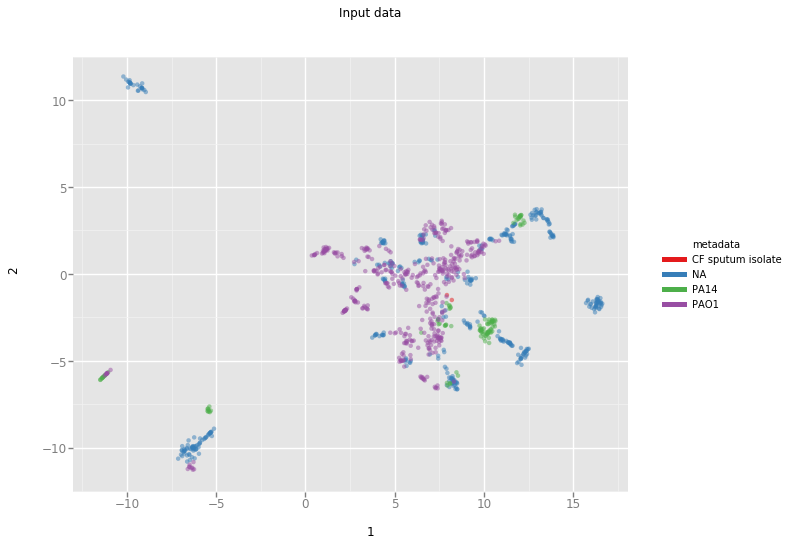

<ggplot: (8738753760495)>

In [11]:
# Plot
if metadata_field == 'treatment':
    color_theme = 'Set3'
else:
    color_theme = 'Set1'
    
ggplot(aes(x='1',y='2', color='metadata'), data=embedding_df) + \
        geom_point(alpha=0.5) + \
        scale_color_brewer(type='qual', palette=color_theme) + \
        ggtitle("Input data")

## Plot encoded data using UMAP

In [12]:
# Merge gene expression data and metadata
data_encoded_labeled = encoded_data.merge(
    metadata,
    left_index=True, 
    right_index=True, 
    how='inner')

print(data_encoded_labeled.shape)
data_encoded_labeled.head(5)

(989, 11)


,1,2,3,4,5,6,7,8,9,10,strain
05_PA14000-4-2_5-10-07_S2.CEL,0.000000,0.000000,0.000000,2.524468,0.084882,0.876957,0.000000,0.0,5.623548,0.000000,PA14
54375-4-05.CEL,0.000000,0.000000,0.000000,2.635002,0.088287,0.295830,0.000000,0.0,1.317349,4.826915,PAO1
AKGlu_plus_nt_7-8-09_s1.CEL,0.000000,0.476683,0.000000,0.000000,0.215922,0.647554,0.464332,0.0,6.250975,0.000000,PA14
DB1.CEL,2.908351,0.000000,0.658458,0.101050,0.587888,0.000000,0.000000,0.0,0.000000,0.000000,PAO1
DB3.CEL,2.725011,0.000000,1.844845,0.000000,0.719269,0.037994,0.000000,0.0,0.000000,0.000000,PAO1


In [13]:
# UMAP embedding of encoded data
embedding_encoded = umap.UMAP(random_state=randomState).fit_transform(data_encoded_labeled.iloc[:,:-1])
embedding_encoded_df = pd.DataFrame(data=embedding_encoded, columns=['1','2'])
embedding_encoded_df['metadata'] = list(data_encoded_labeled[metadata_field])
print(embedding_encoded_df.shape)
embedding_encoded_df.head(5)

/home/alexandra/anaconda3/envs/batch_effects/lib/python3.5/site-packages/numpy/matrixlib/defmatrix.py:68: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  return matrix(data, dtype=dtype, copy=False)


(989, 3)


,1,2,metadata
0,8.981135,1.091987,PA14
1,-0.225052,-2.859654,PAO1
2,8.099725,1.164534,PA14
3,2.172522,-0.140321,PAO1
4,1.911588,0.081100,PAO1


In [14]:
# Replace NaN with string "NA"
embedding_encoded_df['metadata'] = embedding_encoded_df.metadata.fillna('NA')

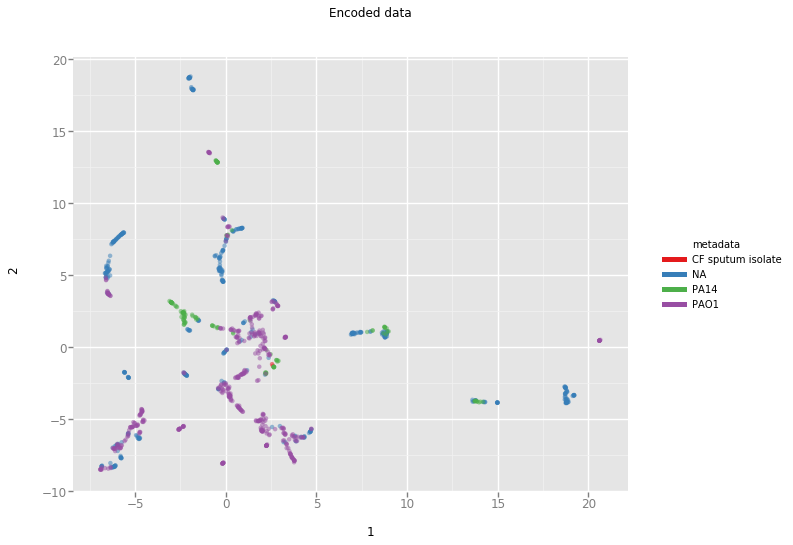

<ggplot: (8738753673266)>

In [15]:
# Plot
ggplot(aes(x='1',y='2', color='metadata'), data=embedding_encoded_df) + \
        geom_point(alpha=0.5) + \
        scale_color_brewer(type='qual', palette=color_theme) + \
        ggtitle("Encoded data")

## Plot decoded data using UMAP

In [16]:
# Decode data back into gene space
data_decoded = loaded_decode_model.predict_on_batch(encoded_data)
data_decoded_df = pd.DataFrame(data_decoded, index=encoded_data.index)

In [17]:
# Merge gene expression data and metadata
data_decoded_labeled = data_decoded_df.merge(
    metadata,
    left_index=True, 
    right_index=True, 
    how='inner')

print(data_decoded_labeled.shape)
data_decoded_labeled.head(5)

(989, 5550)


,0,1,2,3,4,5,6,7,8,9,...,5540,5541,5542,5543,5544,5545,5546,5547,5548,strain
05_PA14000-4-2_5-10-07_S2.CEL,0.839415,0.733599,0.697241,0.757419,0.713242,0.561363,0.147598,0.821458,0.879614,0.204133,...,0.690249,0.794946,0.829735,0.852788,0.172630,0.740777,0.833060,0.872349,0.862448,PA14
54375-4-05.CEL,0.759135,0.737609,0.624235,0.762195,0.461276,0.496553,0.181663,0.702603,0.753607,0.210481,...,0.640067,0.687517,0.660859,0.661256,0.184916,0.552105,0.716792,0.774263,0.747317,PAO1
AKGlu_plus_nt_7-8-09_s1.CEL,0.793605,0.731081,0.664525,0.728057,0.681419,0.514166,0.144080,0.780452,0.847669,0.197671,...,0.683897,0.801373,0.795149,0.820699,0.160532,0.714663,0.769088,0.859559,0.856331,PA14
DB1.CEL,0.398504,0.435525,0.365283,0.363254,0.330503,0.343826,0.356461,0.463195,0.367946,0.240613,...,0.477079,0.454910,0.435000,0.447016,0.474642,0.575617,0.463313,0.540184,0.409016,PAO1
DB3.CEL,0.376200,0.453349,0.334676,0.391625,0.290305,0.334925,0.362956,0.441179,0.361740,0.233461,...,0.477391,0.415135,0.428323,0.440782,0.468208,0.575387,0.445730,0.527233,0.410486,PAO1


In [18]:
# UMAP embedding of decoded data
embedding_decoded = model.transform(data_decoded_labeled.iloc[:,:-1])
embedding_decoded_df = pd.DataFrame(data=embedding_decoded, columns=['1','2'])
embedding_decoded_df['metadata'] = list(data_decoded_labeled[metadata_field])
print(embedding_decoded_df.shape)
embedding_decoded_df.head(5)

(989, 3)


,1,2,metadata
0,12.419855,2.998011,PA14
1,8.275695,0.371602,PAO1
2,12.115512,3.308476,PA14
3,7.522435,-3.820452,PAO1
4,7.293870,-4.042133,PAO1


In [19]:
# Replace NaN with string "NA"
embedding_decoded_df['metadata'] = embedding_decoded_df.metadata.fillna('NA')

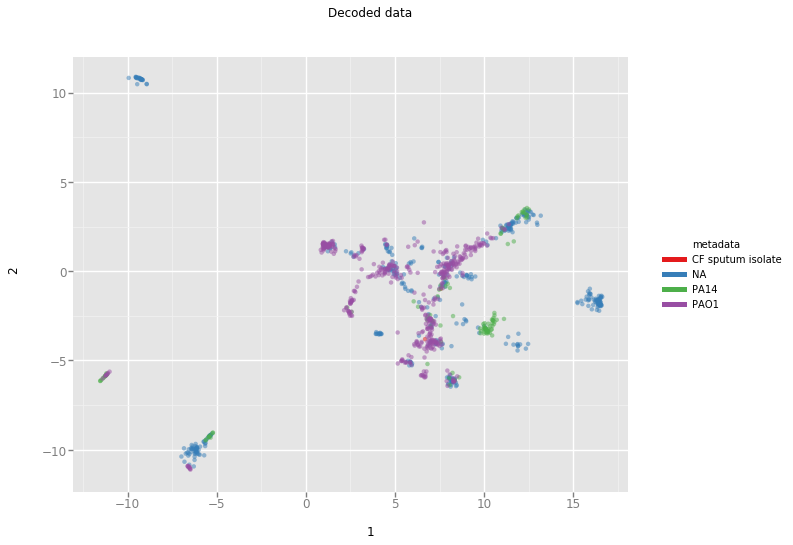

<ggplot: (8738753632597)>

In [20]:
# Plot
ggplot(aes(x='1',y='2', color='metadata'), data=embedding_decoded_df) + \
        geom_point(alpha=0.5) + \
        scale_color_brewer(type='qual', palette=color_theme) + \
        ggtitle("Decoded data")